In [2]:
# Initial Imports:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

# For Data Manipulation:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Decision Tree:
from sklearn import tree

# For Random Forest:
from sklearn.ensemble import RandomForestClassifier

# For SVM:
from sklearn import svm
from sklearn.svm import SVC
from matplotlib import style
style.use('ggplot')

# For Gradient Boosted Trees:
from sklearn.ensemble import GradientBoostingClassifier

# For evaluation:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Pre-Processing:

In [3]:
# First, we read in 15-years worth of NBA data in separate CSVs, then concatenate into one DataFrame.

# Read in 1st CSV/Season:
season_2005_2006_csvpath = Path('CSVs/2005_2006.csv')
season_2005_2006_df = pd.read_csv(season_2005_2006_csvpath)

# Read in 2nd CSV/Season:
season_2006_2007_csvpath = Path('CSVs/2006_2007.csv')
season_2006_2007_df = pd.read_csv(season_2006_2007_csvpath)

# Read in 3rd CSV/Season:
season_2007_2008_csvpath = Path('CSVs/2007_2008.csv')
season_2007_2008_df = pd.read_csv(season_2007_2008_csvpath)

# Read in 4th CSV/Season:
season_2008_2009_csvpath = Path('CSVs/2008_2009.csv')
season_2008_2009_df = pd.read_csv(season_2008_2009_csvpath)

# Read in 5th CSV/Season:
season_2009_2010_csvpath = Path('CSVs/2009_2010.csv')
season_2009_2010_df = pd.read_csv(season_2009_2010_csvpath)

# Read in 6th CSVCSV/Season:
season_2010_2011_csvpath = Path('CSVs/2010_2011.csv')
season_2010_2011_df = pd.read_csv(season_2010_2011_csvpath)

# Read in 7th CSV/Season:
season_2011_2012_csvpath = Path('CSVs/2011_2012.csv')
season_2011_2012_df = pd.read_csv(season_2011_2012_csvpath)

# Read in 8th CSV/Season:
season_2012_2013_csvpath = Path('CSVs/2012_2013.csv')
season_2012_2013_df = pd.read_csv(season_2012_2013_csvpath)

# Read in 9th CSV/Season:
season_2013_2014_csvpath = Path('CSVs/2013_2014.csv')
season_2013_2014_df = pd.read_csv(season_2013_2014_csvpath)

# Read in 10th CSV/Season:
season_2014_2015_csvpath = Path('CSVs/2014_2015.csv')
season_2014_2015_df = pd.read_csv(season_2014_2015_csvpath)

# Read in 11th CSV/Season:
season_2015_2016_csvpath = Path('CSVs/2015_2016.csv')
season_2015_2016_df = pd.read_csv(season_2015_2016_csvpath)

# Read in 12th CSV/Season:
season_2016_2017_csvpath = Path('CSVs/2016_2017.csv')
season_2016_2017_df = pd.read_csv(season_2016_2017_csvpath)

# Read in 13th CSV/Season:
season_2017_2018_csvpath = Path('CSVs/2017_2018.csv')
season_2017_2018_df = pd.read_csv(season_2017_2018_csvpath)

# Read in 14th CSV/Season:
season_2018_2019_csvpath = Path('CSVs/2018_2019.csv')
season_2018_2019_df = pd.read_csv(season_2018_2019_csvpath)

# Read in 15th CSV/Season:
season_2019_2020_csvpath = Path('CSVs/2019_2020.csv')
season_2019_2020_df = pd.read_csv(season_2019_2020_csvpath)

# Concatenate all seasons into one DataFrame:
original_df = pd.concat([season_2005_2006_df, season_2006_2007_df, season_2007_2008_df, season_2008_2009_df, season_2009_2010_df, season_2010_2011_df, season_2011_2012_df, season_2012_2013_df, season_2013_2014_df, season_2014_2015_df, season_2015_2016_df, season_2016_2017_df, season_2017_2018_df, season_2018_2019_df, season_2019_2020_df], axis = 'rows', join='inner')

# Set Pandas option to show all DataFrame columns (without showing truncated ... in middle):
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Preview original DataFrame:
original_df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim,PF,29,SAC,72,30,1961,6.1,11.6,0.525,0.1,0.4,0.227,6.0,11.2,0.536,4.0,5.1,0.784,1.9,4.6,6.6,2.7,0.9,0.8,2.0,4.2,16.3
1,2,Alex Acker,SG,23,DET,5,0,35,4.1,16.5,0.250,1.0,5.1,0.200,3.1,11.3,0.273,0.0,0.0,NaN,1.0,4.1,5.1,4.1,1.0,0.0,4.1,4.1,9.3
2,3,Malik Allen,PF,27,CHI,54,20,701,6.2,12.7,0.490,0.1,0.1,1.000,6.2,12.6,0.488,1.2,2.0,0.605,2.3,4.9,7.2,1.0,0.7,0.8,1.7,4.7,13.7


In [5]:
original_df.shape

(7089, 29)

In [3]:
# Create pre-conversion "shape" variable:
shape_pre_conversion = original_df.shape

In [4]:
# Filter DataFrame to only include rows with at least 820 Minutes Played (10 min/game * 82/games)
# Rows containing players with less than 820 minutes played would unfairly skew the data.
# For instance, if a player plays only 1 minute for a team and scores 2 points, his Points Per 36 Minutes would be 72;
# clearly not a fair representation.

original_df = original_df[original_df.MP >= 820]
original_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim,PF,29,SAC,72,30,1961,6.1,11.6,0.525,0.1,0.4,0.227,6.0,11.2,0.536,4.0,5.1,0.784,1.9,4.6,6.6,2.7,0.9,0.8,2.0,4.2,16.3
3,4,Ray Allen*,SG,30,SEA,78,78,3022,8.1,17.9,0.454,3.2,7.8,0.412,4.9,10.1,0.486,3.9,4.3,0.903,0.8,3.1,4.0,3.4,1.3,0.2,2.2,1.8,23.3
4,5,Tony Allen,PG,24,BOS,51,9,978,4.7,10.1,0.471,0.4,1.3,0.324,4.3,8.8,0.492,3.7,4.9,0.746,1.2,2.9,4.1,2.5,1.9,0.7,2.5,4.6,13.6
5,6,Rafer Alston,PG,29,HOU,63,63,2431,4.1,10.9,0.379,1.5,4.6,0.327,2.6,6.3,0.418,1.5,2.1,0.692,0.5,3.2,3.8,6.3,1.5,0.2,2.3,2.9,11.3
8,9,Derek Anderson,SG,31,TOT,43,11,1047,3.7,10.4,0.356,1.4,4.6,0.299,2.3,5.8,0.402,3.2,3.8,0.838,0.7,4.2,4.9,3.5,0.8,0.2,1.9,3.4,12.0


### Note that numbers represent stats/36 min, not stats/game.  This ensures that the averages are more on scale.  By this, I mean that the stats for a player who has a small number of minutes/game (but still made the cut because they played enough total minutes) does not skew the data.  By scaling all the statistics to be per minute, the players' statistics are a fairer representation of the role they play on the team.

In [5]:
# Slice original dataframe into new dataframe with relevant columns, while appropriately ordering columns:
df = original_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV', 'Pos']]

# Drop nulls:
df = df.dropna()

# Convert mixed positions, like "C-PF" and "PF-SF" into one of the 5 main basketball positions:
df = df.replace("C-PF","C")
df = df.replace("PF-SF","PF")
df = df.replace("SF-SG","SF")
df = df.replace("SG-PG","SG")
df = df.replace("PF-C","PF")
df = df.replace("PG-SG","PG")
df = df.replace("SF-PF","SF")
df = df.replace("SG-SF","SG")
df = df.replace("SG-PF","SG")

# Round all numerical columns to show 2 decimals max:
df = df.round({'PTS': 2})
df = df.round({'TRB': 2})
df = df.round({'ORB': 2})
df = df.round({'AST': 2})
df = df.round({'STL': 2})
df = df.round({'BLK': 2})
df = df.round({'FG': 2})
df = df.round({'FGA': 2})
df = df.round({'FG%': 2})
df = df.round({'3P': 2})
df = df.round({'3PA': 2})
df = df.round({'3P%': 2})
df = df.round({'2P': 2})
df = df.round({'2PA': 2})
df = df.round({'2P%': 2})
df = df.round({'FT': 2})
df = df.round({'FTA': 2})
df = df.round({'FT%': 2})
df = df.round({'PF': 2})
df = df.round({'TOV': 2})

# Confirm new DataFrame:
df.head()

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV,Pos
0,16.3,6.6,1.9,2.7,0.9,0.8,6.1,11.6,0.52,0.1,0.4,0.23,6.0,11.2,0.54,4.0,5.1,0.78,4.2,2.0,PF
3,23.3,4.0,0.8,3.4,1.3,0.2,8.1,17.9,0.45,3.2,7.8,0.41,4.9,10.1,0.49,3.9,4.3,0.90,1.8,2.2,SG
4,13.6,4.1,1.2,2.5,1.9,0.7,4.7,10.1,0.47,0.4,1.3,0.32,4.3,8.8,0.49,3.7,4.9,0.75,4.6,2.5,PG
5,11.3,3.8,0.5,6.3,1.5,0.2,4.1,10.9,0.38,1.5,4.6,0.33,2.6,6.3,0.42,1.5,2.1,0.69,2.9,2.3,PG
8,12.0,4.9,0.7,3.5,0.8,0.2,3.7,10.4,0.36,1.4,4.6,0.30,2.3,5.8,0.40,3.2,3.8,0.84,3.4,1.9,SG


In [6]:
shape_post_conversion = df.shape

print(f'Shape Pre-Conversion: {shape_pre_conversion}')
print(f'Shape Post-Conversion: {shape_post_conversion}')

Shape Pre-Conversion: (7089, 29)
Shape Post-Conversion: (4051, 21)


In [7]:
# Check how many of each position in y-dataset:
df.loc[:, 'Pos'].value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

# Data Visualization:

In [8]:
# Groupby "position" and calculate average of each column, per position:
summary_df = df.groupby('Pos').mean()
summary_df.head()

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV
Pos,,,,,,,,,,,,,,,,,,,,
C,14.969737,10.123026,3.121546,2.105592,0.912007,1.553454,5.918750,11.546217,0.517039,0.317763,0.943257,0.171497,5.599013,10.600164,0.531562,2.807401,4.006086,0.700181,3.916776,2.058553
PF,15.100000,8.214619,2.244103,2.179730,0.997174,0.885258,5.793489,12.329484,0.469668,0.951843,2.698034,0.270590,4.840909,9.628010,0.501794,2.554545,3.461425,0.735037,3.413882,1.841278
PG,15.098053,3.889691,0.692096,6.211798,1.347194,0.259450,5.495762,12.736312,0.429530,1.429439,4.022337,0.337010,4.064032,8.717182,0.462875,2.676518,3.325544,0.796128,2.704238,2.540664
SF,14.359580,5.592213,1.212361,2.485167,1.168480,0.575525,5.224722,11.826452,0.440284,1.449567,4.053770,0.341014,3.774660,7.772682,0.485426,2.460445,3.176020,0.764376,2.841286,1.733993
SG,15.631151,4.172017,0.784266,3.188490,1.169799,0.363464,5.642661,13.052059,0.431183,1.784055,4.879092,0.353717,3.857339,8.173390,0.470760,2.560084,3.194403,0.793939,2.668110,1.913094


#### We can glean useful information from the above chart.  We see that in terms of, say, PTS, there is not much difference position-by-position: each averages about 15 points/36 minutes.  However we see serious differences in a few categories, which are the ones we would expect; most namely, TRB (Total Rebounds) and AST (Assists).  While point guards take the ball up the court and distribute the ball, leading to assists (PG's average 6.2 assists while C's average 2.1 assists), centers are taller and have a more rebound-heavy responsibility (C's average 10.1 rebounds while PG's average 3.9 rebounds).  This gives a good idea about what to expect in the model, especially in terms of what the model deems to be the most important features that help determine a player's position.

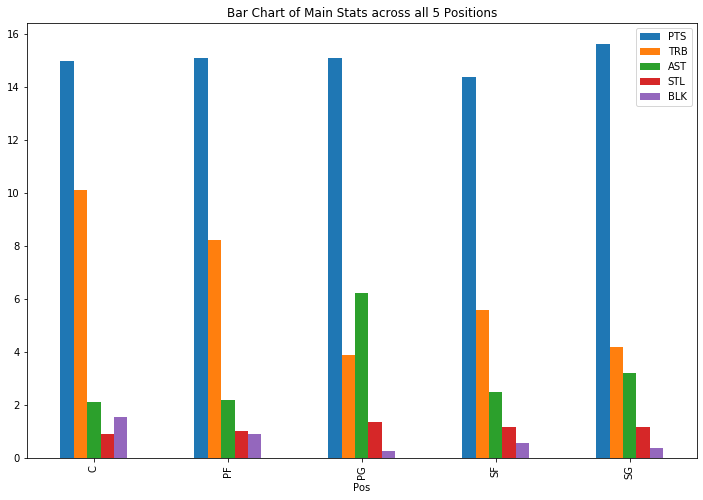

In [9]:
# Visualization 1 of 2:
bar_chart_df = summary_df[['PTS', 'TRB', 'AST', 'STL', 'BLK']]
bar_chart_df.plot(kind='bar', figsize = (12, 8), title='Bar Chart of Main Stats across all 5 Positions')

#### This simple bar plot shows the five main basketball statistics - Points, Rebounds, Assists, Steals and Blocks - and how they are distributed among the five positions.  As mentioned above, points/36 minutes do not differ that greatly position-by-position; rebounds and assists, however, vary greatly.  We can also see in yellow that centers average signficantly more blocks than other positions - blocks in general are hard to come by, so while centers average only 1.6 blocks/36 minutes, point guards average only .26 blocks/36 minutes, meaning in this particular dataset, centers average 144% more blocks/36 minutes than do point guards.  This feautre could potentially be deemed one of the more important ones by the upcoming models.

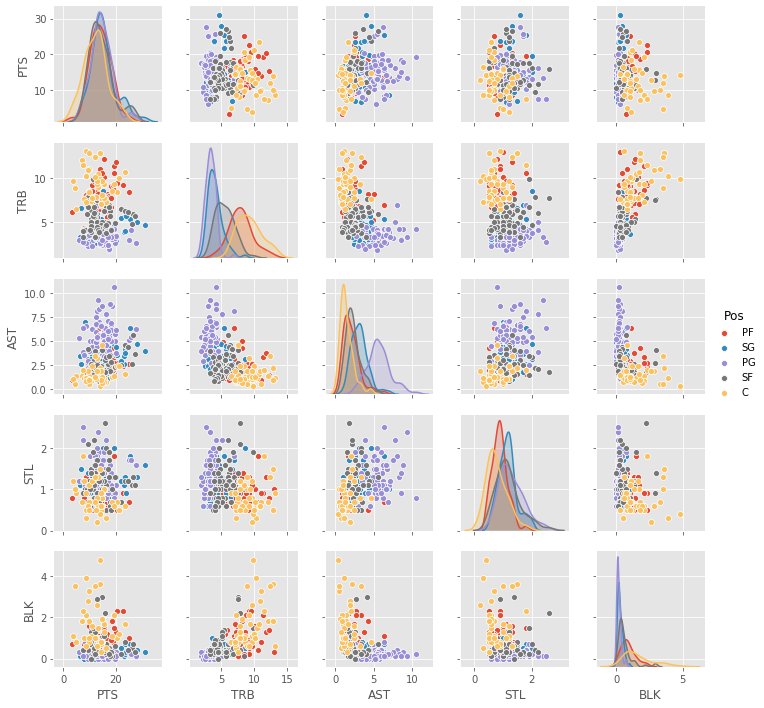

In [12]:
# Visualization 2 of 2:
sns_df = df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'Pos']].head(300)
sns_df = sns_df.reset_index()
sns_df = sns_df.drop('index', axis=1)

sns_plot = sns.pairplot(sns_df, hue='Pos', size=2)
sns_plot

#### Here we see scatter plots of all possible x/y-axis combinations.  The first thing I notice is the general positive correlation in these graphs - meaning, as the x-axis values increase, so do the y-values.  This makes sense to me, as it tells me that the better a player is at one particular category, chances are, they are also good at other statistical categories (good players don't just do one thing well).  However, with TRB and AST, it appears the opposite is true: generally speaking, the more assists a player has, or the more rebounds,  the less of the other stat they will have.

#### The diagonal gives us insight into the distribution of each variable, broken down by position - it helps visualize the ranges in values by position.  Looking at the TRB vs. TRB intersection, for example, we see that centers have a longer tail than other positions, while for the AST metric, point guards have a longer tail than other positions - the longer tail indicates a wider distribution, a larger range of values).  While most categories have varied distributions, the PTS distribution remains relatively steady across all five positions.

# Decision Tree (1 of 3):
### This model will use *all* features, and will *not* use PCA transformation on X-data.

In [11]:
# New clean dataframe:
df_decision_tree1 = df.copy()

# Set X (features) and y (target):
X = df_decision_tree1.drop('Pos', axis=1)
y = df_decision_tree1.loc[:, 'Pos']

# Manually encode y-labels to make them more meaningful for the confusion matrix during evaluation:
position_dictionary = {
    "PG": 1,
    "SG": 2,
    "SF": 3,
    "PF": 4,
    "C": 5}

y = y.map(position_dictionary).values.reshape(-1,1)

# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 20)
y_train: (3038, 1)
X_test: (1013, 20)
y_test: (1013, 1)


In [12]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Create, fit and predict Decision Tree Model:
dt1_model = tree.DecisionTreeClassifier(random_state=1)
dt1_model = dt1_model.fit(X_train_scaled, y_train)
predictions = dt1_model.predict(X_test_scaled)

In [14]:
# Print accuracy score:
dt1_accuracy_score = accuracy_score(y_test, predictions)
dt1_accuracy_score

0.6169792694965449

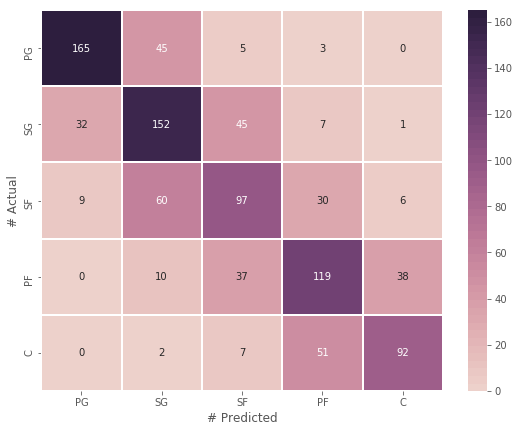

In [15]:
# Define Custom Confusion Matrix function that plots Heatmap of Actuals vs. Predictions:

def confusion_matrix_heatmap(y_test, predictions):
    """This plots the confusion matrix"""
    warnings.filterwarnings('ignore')

    cm = confusion_matrix(y_test, predictions)

    # Plot Heatmap:
    f, ax = plt.subplots(figsize=(9, 7))
    heat_map = sns.heatmap(cm, annot=True, fmt="d", linewidths=1, ax=ax, cmap=sns.cubehelix_palette(50), xticklabels=position_dictionary.keys(), yticklabels=position_dictionary.keys())

    # Set X and Y Labels:
    heat_map.set_xlabel("# Predicted")
    heat_map.set_ylabel("# Actual")
    
# Print confusion matrix:
cm1 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (165+45+5+3+0), the model correctly predicted "point guard" 165 times.  45 times it thought the point guard was a shooting guard, 5 times it thought the point guard was a small forward, 3 times it thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [16]:
# Print classification report:
dt1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt1_class_report)

              precision    recall  f1-score   support

          PG       0.80      0.76      0.78       218
          SG       0.57      0.64      0.60       237
          SF       0.51      0.48      0.49       202
          PF       0.57      0.58      0.57       204
           C       0.67      0.61      0.64       152

    accuracy                           0.62      1013
   macro avg       0.62      0.61      0.62      1013
weighted avg       0.62      0.62      0.62      1013



#### What do these scores mean?
Precision: Accuracy of positive predictions: The model positively predicted a position (meaning it said it *is this* position as opposed to *it is NOT that position*) at a 62% rate.

Recall: Fraction of positives that were correctly identified: The model caught 61% of the positive cases.

F1 Score: The percentage of positive predictions correctly predicted: The model correctly predicted 62% of the positive predictions.

Support: Number of occurrences in the dataset, AKA, the number of rows in the dataset.  This dataset contained 1013 rows of data and therefore had a Support score of 1013.

In [17]:
# List features ordered by feature importance:
dt1_importances = pd.DataFrame(dt1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
dt1_importances

,Importance
TRB,0.260346
AST,0.199898
BLK,0.069038
PF,0.051697
STL,0.037717
3PA,0.034033
FT%,0.033457
ORB,0.032945
2PA,0.030856
PTS,0.029383


#### We can see that Decision Tree 1 deemed TRB, AST, BLK, PF and STL to be the most important features that help the model predict positions.  It deemed FG, 3P%, FGA, 3P and FT to be the least important features.  This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do *not* differ greatly position-by-position (like FG and FGA) the model deems to be unhelpful toward making predictions.

---

# Decision Tree (2 of 3):
### This model will use *all* features, like Decision Tree 1, but will *also* use PCA transformation of X-data to reduce dataset dimensions.

In [18]:
# New clean dataframe:
df2_decision_tree = df.copy()
df2_decision_tree.head()

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV,Pos
0,16.3,6.6,1.9,2.7,0.9,0.8,6.1,11.6,0.52,0.1,0.4,0.23,6.0,11.2,0.54,4.0,5.1,0.78,4.2,2.0,PF
3,23.3,4.0,0.8,3.4,1.3,0.2,8.1,17.9,0.45,3.2,7.8,0.41,4.9,10.1,0.49,3.9,4.3,0.90,1.8,2.2,SG
4,13.6,4.1,1.2,2.5,1.9,0.7,4.7,10.1,0.47,0.4,1.3,0.32,4.3,8.8,0.49,3.7,4.9,0.75,4.6,2.5,PG
5,11.3,3.8,0.5,6.3,1.5,0.2,4.1,10.9,0.38,1.5,4.6,0.33,2.6,6.3,0.42,1.5,2.1,0.69,2.9,2.3,PG
8,12.0,4.9,0.7,3.5,0.8,0.2,3.7,10.4,0.36,1.4,4.6,0.30,2.3,5.8,0.40,3.2,3.8,0.84,3.4,1.9,SG


In [19]:
# Set X (features) and y (target):
X = df2_decision_tree.drop('Pos', axis=1)
y = df2_decision_tree.loc[:, 'Pos']

In [20]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [21]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [22]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 20)
y_train: (3038, 1)
X_test: (1013, 20)
y_test: (1013, 1)


In [23]:
# Scale X-data before using PCA to reduce dimensions:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Now, use PCA to reduce dimensions:
pca = PCA(n_components=3)
X_pca = pca.fit(X_train_scaled)

X_train_pca = X_pca.transform(X_train_scaled)
X_test_pca = X_pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(data = X_train_pca, columns = ["PC1", "PC2", "PC3"])
X_test_pca_df = pd.DataFrame(data = X_test_pca, columns = ["PC1", "PC2", "PC3"])

X_train_pca_df.head()

,PC1,PC2,PC3
0,0.960981,0.230445,-0.926694
1,-0.723876,-3.637974,0.466127
2,-2.345355,-1.575613,-0.410993
3,-1.260926,-0.334817,-1.104811
4,2.195174,-4.820035,0.969597


In [25]:
pca.explained_variance_ratio_

array([0.33079639, 0.27737721, 0.09351965])

#### According to the above Explained Variance Ratio, we have 70% of the information captured in this model.

In [26]:
# Create, fit, and predict Decision Tree 2 Model:
dt2_model = tree.DecisionTreeClassifier(random_state=1)
dt2_model = dt2_model.fit(X_train_pca, y_train)
predictions = dt2_model.predict(X_test_pca)

In [27]:
# Print accuracy score:
dt2_accuracy_score = accuracy_score(y_test, predictions)
dt2_accuracy_score

0.5004935834155972

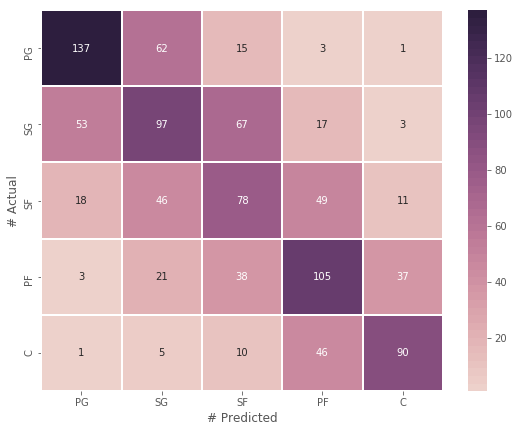

In [28]:
# Print confusion matrix using pre-defined function:
cm2 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (137+62+15+3+1), the model correctly predicted "point guard" 137 times.  62 times it thought the point guard was a shooting guard, 15 times it thought the point guard was a small forward, 3 times it thought the point guard was a power forward, and 1 time it thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [29]:
# Print classification report:
dt2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt2_class_report)

              precision    recall  f1-score   support

          PG       0.65      0.63      0.64       218
          SG       0.42      0.41      0.41       237
          SF       0.38      0.39      0.38       202
          PF       0.48      0.51      0.50       204
           C       0.63      0.59      0.61       152

    accuracy                           0.50      1013
   macro avg       0.51      0.51      0.51      1013
weighted avg       0.50      0.50      0.50      1013



#### A Feature Importance table cannot be run on X-data that has been PCA transformed, as the original features no longer exist.

# Decision Tree Comparison:
### Compare Decision Tree Results (did PCA Transformation of the X-data improve or worsen model?)

In [30]:
print(f'Decision Tree 1 Accuracy Score (no PCA): {dt1_accuracy_score}. \nDecision Tree 2 Accuracy Score (with PCA): {dt2_accuracy_score}.')

Decision Tree 1 Accuracy Score (no PCA): 0.6169792694965449. 
Decision Tree 2 Accuracy Score (with PCA): 0.5004935834155972.


In [31]:
print(f'DT1 Class. Report (no PCA): {dt1_class_report}. \nDT2 Class. Report (with PCA): {dt2_class_report}.')

DT1 Class. Report (no PCA):               precision    recall  f1-score   support

          PG       0.80      0.76      0.78       218
          SG       0.57      0.64      0.60       237
          SF       0.51      0.48      0.49       202
          PF       0.57      0.58      0.57       204
           C       0.67      0.61      0.64       152

    accuracy                           0.62      1013
   macro avg       0.62      0.61      0.62      1013
weighted avg       0.62      0.62      0.62      1013
. 
DT2 Class. Report (with PCA):               precision    recall  f1-score   support

          PG       0.65      0.63      0.64       218
          SG       0.42      0.41      0.41       237
          SF       0.38      0.39      0.38       202
          PF       0.48      0.51      0.50       204
           C       0.63      0.59      0.61       152

    accuracy                           0.50      1013
   macro avg       0.51      0.51      0.51      1013
weighted avg     

#### Based on the above results, it appears that the model *without* PCA transformation of X-data is a better model than the one *with* PCA transformation.
- 61.7% accuracy vs. 50.0% accuracy.
- 62% precision vs. 51% precision.
- 61% recall vs. 51% recall.
- 62% f1 score vs. 51% F1 score.

#### Therefore, in my third and final Decision Tree, I will *not* use PCA transformation.

---

# Decision Tree (3 of 3):
### This model will use the top 5 features, identified by Decision Tree 1's "Feature Importance" table, and based on the previous results, will *not* incorporate PCA transformation.

In [32]:
# First, remind ourselves what the first Decision Tree identified as the top 5 features:
dt1_importances.head()

,Importance
TRB,0.260346
AST,0.199898
BLK,0.069038
PF,0.051697
STL,0.037717


#### Now, re-run the Decision Tree model without using PCA data transformation, only using these top 5 features, as opposed to the 20 features used in the previous two models:

In [33]:
# New clean dataframe:
df_decision_tree3 = df.copy()
df_decision_tree3 = df_decision_tree3[['TRB', 'AST', 'BLK', 'PF', 'STL', 'Pos']]
df_decision_tree3.head()

,TRB,AST,BLK,PF,STL,Pos
0,6.6,2.7,0.8,4.2,0.9,PF
3,4.0,3.4,0.2,1.8,1.3,SG
4,4.1,2.5,0.7,4.6,1.9,PG
5,3.8,6.3,0.2,2.9,1.5,PG
8,4.9,3.5,0.2,3.4,0.8,SG


In [34]:
# Set X (features) and y (target):
X = df_decision_tree3.drop('Pos', axis=1)
y = df_decision_tree3.loc[:, 'Pos']

In [35]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [36]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [37]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 5)
y_train: (3038, 1)
X_test: (1013, 5)
y_test: (1013, 1)


In [38]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Create, fit, and predict Decision Tree Model:
dt3_model = tree.DecisionTreeClassifier(random_state=1)
dt3_model = dt3_model.fit(X_train_scaled, y_train)
predictions = dt3_model.predict(X_test_scaled)

In [40]:
# Print accuracy score:
dt3_accuracy_score = accuracy_score(y_test, predictions)
dt3_accuracy_score

0.596248766041461

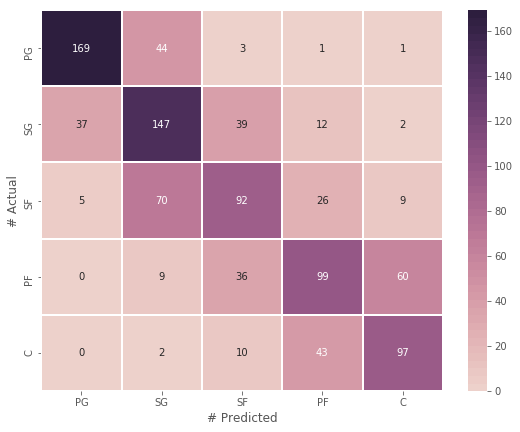

In [41]:
# Print confusion matrix using pre-defined function:
cm3 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (169+44+3+1+1), the model correctly predicted "point guard" 169 times.  44 times it thought the point guard was a shooting guard, 3 times it thought the point guard was a small forward, 1 time it thought the point guard was a power forward, and 1 time it thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [42]:
# Print classification report:
dt3_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt3_class_report)

              precision    recall  f1-score   support

          PG       0.80      0.78      0.79       218
          SG       0.54      0.62      0.58       237
          SF       0.51      0.46      0.48       202
          PF       0.55      0.49      0.51       204
           C       0.57      0.64      0.60       152

    accuracy                           0.60      1013
   macro avg       0.59      0.59      0.59      1013
weighted avg       0.60      0.60      0.59      1013



### Compare the results of Decision Tree 3 to those of Decision Tree 1; did reducing features to the top 5 improve the model?

In [43]:
print(f'Decision Tree 1 Accuracy Score (all 20 features): {dt1_accuracy_score}. \nDecision Tree 3 Accuracy Score (top 5 features): {dt3_accuracy_score}.')

Decision Tree 1 Accuracy Score (all 20 features): 0.6169792694965449. 
Decision Tree 3 Accuracy Score (top 5 features): 0.596248766041461.


In [44]:
print(f'DT1 Class. Report (all 20 features): {dt1_class_report}. \nDT3 Class. Report (top 5 features): {dt3_class_report}.')

DT1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.80      0.76      0.78       218
          SG       0.57      0.64      0.60       237
          SF       0.51      0.48      0.49       202
          PF       0.57      0.58      0.57       204
           C       0.67      0.61      0.64       152

    accuracy                           0.62      1013
   macro avg       0.62      0.61      0.62      1013
weighted avg       0.62      0.62      0.62      1013
. 
DT3 Class. Report (top 5 features):               precision    recall  f1-score   support

          PG       0.80      0.78      0.79       218
          SG       0.54      0.62      0.58       237
          SF       0.51      0.46      0.48       202
          PF       0.55      0.49      0.51       204
           C       0.57      0.64      0.60       152

    accuracy                           0.60      1013
   macro avg       0.59      0.59      0.59      1013
we

#### Based on the above results, it appears that the model that uses all 20 features is slightly better than the one that uses only the top 5:
- 61.7% accuracy vs. 59.6% accuracy.
- 62% precision vs. 59% precision.
- 61% recall vs. 59% recall.
- 62% F1 score vs. 59% F1 score.

# Final Decision Trees Conclusion:
### After running the three Decision Tree models, I achieved a max accuracy score of 61.7% - this model used all 20 features and did *not* undergo PCA transformation of X-data.  So we have one model with a 61.7% accuracy score - let's try some other models and see if we can get it to increase.

---

# Random Forest (1 of 2):
### These models are more a bit more complex than Decision Trees and take it a step further - I expect better results. We will run each model twice - once using all 20 features, and next, using only the top 5 most important features deemed by the first model.

### This first Random Forest model will use *all* features.

In [45]:
# New clean dataframe:
df1_randomforest = df_decision_tree1.copy()
df1_randomforest.head()

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV,Pos
0,16.3,6.6,1.9,2.7,0.9,0.8,6.1,11.6,0.52,0.1,0.4,0.23,6.0,11.2,0.54,4.0,5.1,0.78,4.2,2.0,PF
3,23.3,4.0,0.8,3.4,1.3,0.2,8.1,17.9,0.45,3.2,7.8,0.41,4.9,10.1,0.49,3.9,4.3,0.90,1.8,2.2,SG
4,13.6,4.1,1.2,2.5,1.9,0.7,4.7,10.1,0.47,0.4,1.3,0.32,4.3,8.8,0.49,3.7,4.9,0.75,4.6,2.5,PG
5,11.3,3.8,0.5,6.3,1.5,0.2,4.1,10.9,0.38,1.5,4.6,0.33,2.6,6.3,0.42,1.5,2.1,0.69,2.9,2.3,PG
8,12.0,4.9,0.7,3.5,0.8,0.2,3.7,10.4,0.36,1.4,4.6,0.30,2.3,5.8,0.40,3.2,3.8,0.84,3.4,1.9,SG


In [46]:
# Set X (features) and y (target):
X = df1_randomforest.drop('Pos', axis=1)
y = df1_randomforest.loc[:, 'Pos']

In [47]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [48]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [1]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

NameError: name 'train_test_split' is not defined

In [50]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Create, fit, and predict Random Forest Model:
rf1_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf1_model = rf1_model.fit(X_train_scaled, y_train)
predictions = rf1_model.predict(X_test_scaled)

In [52]:
rf1_accuracy_score = accuracy_score(y_test, predictions)
rf1_accuracy_score

0.7137216189536032

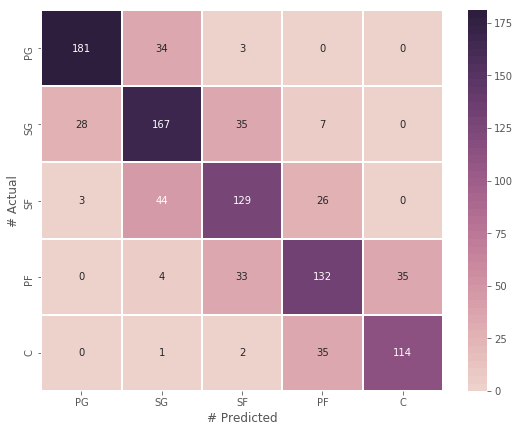

In [53]:
# Print confusion matrix using pre-defined function:
cm4 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (181+34+3+0+0), the model correctly predicted "point guard" 181 times.  34 times it thought the point guard was a shooting guard, 3 times it thought the point guard was a small forward, it never thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [54]:
# Print classification report:
rf1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf1_class_report)

              precision    recall  f1-score   support

          PG       0.85      0.83      0.84       218
          SG       0.67      0.70      0.69       237
          SF       0.64      0.64      0.64       202
          PF       0.66      0.65      0.65       204
           C       0.77      0.75      0.76       152

    accuracy                           0.71      1013
   macro avg       0.72      0.71      0.72      1013
weighted avg       0.72      0.71      0.71      1013



In [55]:
# List features ordered by feature importance:
rf1_importances = pd.DataFrame(rf1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
rf1_importances

,Importance
AST,0.152679
TRB,0.149042
ORB,0.077137
BLK,0.071948
3PA,0.048532
TOV,0.046414
STL,0.041687
PF,0.040585
3P,0.037277
FG%,0.032416


#### We can see that Random Forest 1 deemed AST, TRB, ORB (Offensive Rebounds), BLK and 3PA to be the most important features that help the model predict positions.  It deemed FG, FT, 2P, 3P% and FTA to be the least important features.  This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do *not* differ greatly position-by-position (like FG and FGA) the model deems to be unhelpful toward making predictions.

---

# Random Forest (2 of 2):
### This model will use the top 5 features, identified by Random Forest 1's "Feature Importance" table, rather than all 20 features.

In [56]:
# New clean dataframe:
df2_randomforest = df_decision_tree1.copy()
df2_randomforest = df2_randomforest[['AST', 'TRB', 'ORB', 'BLK', '3PA', 'Pos']]
df2_randomforest.head()

,AST,TRB,ORB,BLK,3PA,Pos
0,2.7,6.6,1.9,0.8,0.4,PF
3,3.4,4.0,0.8,0.2,7.8,SG
4,2.5,4.1,1.2,0.7,1.3,PG
5,6.3,3.8,0.5,0.2,4.6,PG
8,3.5,4.9,0.7,0.2,4.6,SG


In [57]:
# Set X (features) and y (target):
X = df2_randomforest.drop('Pos', axis=1)
y = df2_randomforest.loc[:, 'Pos']

In [58]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [59]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [60]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 5)
y_train: (3038, 1)
X_test: (1013, 5)
y_test: (1013, 1)


In [61]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Create, fit, and predict Random Forest 2 Model:
rf2_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf2_model = rf2_model.fit(X_train_scaled, y_train)
predictions = rf2_model.predict(X_test_scaled)

In [63]:
# Print accuracy score:
rf2_accuracy_score = accuracy_score(y_test, predictions)
rf2_accuracy_score

0.6623889437314906

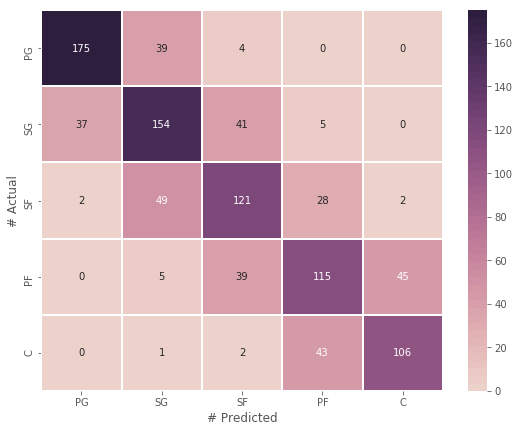

In [64]:
# Print confusion matrix using pre-defined function:
cm5 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (175+39+4+0+0), the model correctly predicted "point guard" 175 times.  39 times it thought the point guard was a shooting guard, 4 times it thought the point guard was a small forward, it never thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [65]:
# Print classification report:
rf2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf2_class_report)

              precision    recall  f1-score   support

          PG       0.82      0.80      0.81       218
          SG       0.62      0.65      0.64       237
          SF       0.58      0.60      0.59       202
          PF       0.60      0.56      0.58       204
           C       0.69      0.70      0.70       152

    accuracy                           0.66      1013
   macro avg       0.66      0.66      0.66      1013
weighted avg       0.66      0.66      0.66      1013



### Compare the results of Random Forest 1 to those of Random Forest 2; did reducing features to the top 5 improve the model?

In [66]:
print(f'Random Forest 1 Accuracy Score (all 20 features): {rf1_accuracy_score}. \nRandom Forest 2 Accuracy Score (top 5 features): {rf2_accuracy_score}.')

Random Forest 1 Accuracy Score (all 20 features): 0.7137216189536032. 
Random Forest 2 Accuracy Score (top 5 features): 0.6623889437314906.


In [67]:
print(f'RF1 Class. Report (all 20 features): {rf1_class_report}. \nRF2 Class. Report (top 5 features): {rf2_class_report}.')

RF1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.85      0.83      0.84       218
          SG       0.67      0.70      0.69       237
          SF       0.64      0.64      0.64       202
          PF       0.66      0.65      0.65       204
           C       0.77      0.75      0.76       152

    accuracy                           0.71      1013
   macro avg       0.72      0.71      0.72      1013
weighted avg       0.72      0.71      0.71      1013
. 
RF2 Class. Report (top 5 features):               precision    recall  f1-score   support

          PG       0.82      0.80      0.81       218
          SG       0.62      0.65      0.64       237
          SF       0.58      0.60      0.59       202
          PF       0.60      0.56      0.58       204
           C       0.69      0.70      0.70       152

    accuracy                           0.66      1013
   macro avg       0.66      0.66      0.66      1013
we

#### Based on the above results, it appears that the model that uses all 20 features is better than the one that uses only the top 5:
- 71.4% accuracy vs. 66.2% accuracy.
- 72% precision vs. 66% precision.
- 71% recall vs. 66% recall.
- 72% F1 score vs. 66% F1 score.

# Final Random Forest Conclusion:
### After running the two Random Forest models, I achieved a max accuracy score of 71.4% - this model used all 20 features.  This is a marked improvement from the best Decision Tree accuracy score of 61.7%.  Let's continue with some different models and see how those affect the model's performance.

---

# Support Vector Machine Model (SVM) (1 of 2):
### We will run each model twice - once using all 20 features, and next, using only the top 5 most important features deemed by the first model.

### This first SVM model will use *all* features.

In [68]:
# New clean dataframe:
df1_svm1 = df_decision_tree1.copy()
df1_svm1.head()

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV,Pos
0,16.3,6.6,1.9,2.7,0.9,0.8,6.1,11.6,0.52,0.1,0.4,0.23,6.0,11.2,0.54,4.0,5.1,0.78,4.2,2.0,PF
3,23.3,4.0,0.8,3.4,1.3,0.2,8.1,17.9,0.45,3.2,7.8,0.41,4.9,10.1,0.49,3.9,4.3,0.90,1.8,2.2,SG
4,13.6,4.1,1.2,2.5,1.9,0.7,4.7,10.1,0.47,0.4,1.3,0.32,4.3,8.8,0.49,3.7,4.9,0.75,4.6,2.5,PG
5,11.3,3.8,0.5,6.3,1.5,0.2,4.1,10.9,0.38,1.5,4.6,0.33,2.6,6.3,0.42,1.5,2.1,0.69,2.9,2.3,PG
8,12.0,4.9,0.7,3.5,0.8,0.2,3.7,10.4,0.36,1.4,4.6,0.30,2.3,5.8,0.40,3.2,3.8,0.84,3.4,1.9,SG


In [69]:
# Set X (features) and y (target):
X = df1_svm1.drop('Pos', axis=1)
y = df1_svm1.loc[:, 'Pos']

In [70]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [71]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [72]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 20)
y_train: (3038, 1)
X_test: (1013, 20)
y_test: (1013, 1)


In [73]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Create, fit, and predict Random Forest Model:
svm1_model = svm.SVC(kernel='linear', random_state=1)
svm1_model = svm1_model.fit(X_train_scaled, y_train)
predictions = svm1_model.predict(X_test_scaled)

In [75]:
svm1_accuracy_score = accuracy_score(y_test, predictions)
svm1_accuracy_score

0.7058242843040474

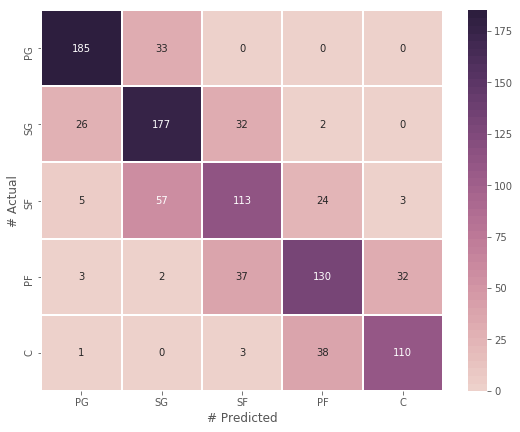

In [76]:
# Print confusion matrix using pre-defined function:
cm6 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (185+33+0+0+0), the model correctly predicted "point guard" 185 times.  33 times it thought the point guard was a shooting guard, it never thought the point guard was a small forward, it never thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [77]:
# Print classification report:
svm1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(svm1_class_report)

              precision    recall  f1-score   support

          PG       0.84      0.85      0.84       218
          SG       0.66      0.75      0.70       237
          SF       0.61      0.56      0.58       202
          PF       0.67      0.64      0.65       204
           C       0.76      0.72      0.74       152

    accuracy                           0.71      1013
   macro avg       0.71      0.70      0.70      1013
weighted avg       0.71      0.71      0.70      1013



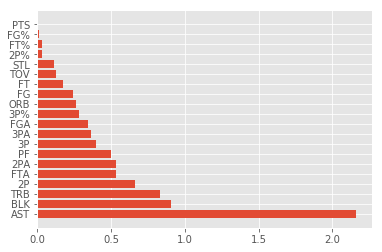

In [78]:
# Construct plot that displays Feature Importances (SVM Model does not have a simple Feature Importance list like Decision Trees and Random Forests):
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

feature_names = ['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']
f_importances(abs(svm1_model.coef_[0]), feature_names)

#### We can see that SVM 1 deemed AST, BLK, TRB, 2P and FTA to be the most important features that help the model predict positions.  It deemed PTS, FG%, FT%, 2P% and STL to be the least important features.  This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do *not* differ greatly position-by-position (like PTS) the model deems to be unhelpful toward making predictions.

---

# Support Vector Machine Model (SVM) (2 of 2):

### This model will use the top 5 features, identified by SVM 1's "Feature Importance" chart, rather than all features.

In [79]:
# New clean dataframe:
df2_svm2 = df_decision_tree1.copy()
df2_svm2 = df2_svm2[['AST', 'BLK', 'TRB', '2P', 'FTA', 'Pos']]
df2_svm2.head()

,AST,BLK,TRB,2P,FTA,Pos
0,2.7,0.8,6.6,6.0,5.1,PF
3,3.4,0.2,4.0,4.9,4.3,SG
4,2.5,0.7,4.1,4.3,4.9,PG
5,6.3,0.2,3.8,2.6,2.1,PG
8,3.5,0.2,4.9,2.3,3.8,SG


In [80]:
# Set X (features) and y (target):
X = df2_svm2.drop('Pos', axis=1)
y = df2_svm2.loc[:, 'Pos']

In [81]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [82]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [83]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 5)
y_train: (3038, 1)
X_test: (1013, 5)
y_test: (1013, 1)


In [84]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [85]:
# Create, fit, and predict SVM 2 Model:
svm2_model = svm.SVC(kernel='linear', random_state=1)
svm2_model = svm2_model.fit(X_train_scaled, y_train)
predictions = svm2_model.predict(X_test_scaled)

In [86]:
# Print accuracy score:
svm2_accuracy_score = accuracy_score(y_test, predictions)
svm2_accuracy_score

0.6722606120434353

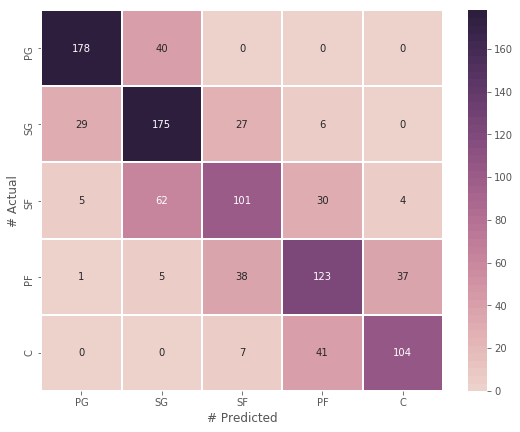

In [87]:
# Print confusion matrix using pre-defined function:
cm7 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (178+40+0+0+0), the model correctly predicted "point guard" 178 times.  40 times it thought the point guard was a shooting guard, it never thought the point guard was a small forward, it never thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [88]:
# Print classification report:
svm2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(svm2_class_report)

              precision    recall  f1-score   support

          PG       0.84      0.82      0.83       218
          SG       0.62      0.74      0.67       237
          SF       0.58      0.50      0.54       202
          PF       0.61      0.60      0.61       204
           C       0.72      0.68      0.70       152

    accuracy                           0.67      1013
   macro avg       0.67      0.67      0.67      1013
weighted avg       0.67      0.67      0.67      1013



### Compare the results of SVM 1 to those of SVM 2; did reducing features to the top 5 improve the model?

In [89]:
print(f'SVM 1 Accuracy Score (all 20 features): {svm1_accuracy_score}. \nSVM 2 Accuracy Score (top 5 features): {svm2_accuracy_score}.')

SVM 1 Accuracy Score (all 20 features): 0.7058242843040474. 
SVM 2 Accuracy Score (top 5 features): 0.6722606120434353.


In [90]:
print(f'SVM1 Class. Report (all 20 features): {svm1_class_report}. \nSVM2 Class. Report (top 5 features): {svm2_class_report}.')

SVM1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.84      0.85      0.84       218
          SG       0.66      0.75      0.70       237
          SF       0.61      0.56      0.58       202
          PF       0.67      0.64      0.65       204
           C       0.76      0.72      0.74       152

    accuracy                           0.71      1013
   macro avg       0.71      0.70      0.70      1013
weighted avg       0.71      0.71      0.70      1013
. 
SVM2 Class. Report (top 5 features):               precision    recall  f1-score   support

          PG       0.84      0.82      0.83       218
          SG       0.62      0.74      0.67       237
          SF       0.58      0.50      0.54       202
          PF       0.61      0.60      0.61       204
           C       0.72      0.68      0.70       152

    accuracy                           0.67      1013
   macro avg       0.67      0.67      0.67      1013


#### Based on the above results, it appears that the model that uses all 20 features is slightly better than the one that uses only the top 5:
- 70.6% accuracy vs. 67.2% accuracy.
- 71% precision vs. 67% precision.
- 70% recall vs. 67% recall.
- 70% f1 score vs. 67% f1 score.

# Final Support Vector Machine (SVM) Conclusion:
### After running the two SVM models, I achieved a max accuracy score of 70.6% - this model used all 20 features.  This is a slight decrease from the 71.4% accuracy of Random Forest 1 model, but is still good.  Let's continue with one more model and see if it improves.

---

# Gradient Boosted Trees (1 of 2):
### We will run each model twice - once using all 20 features, and next, using only the top 5 most important features deemed by the first model.

### This first GBT model will use *all* features.

In [91]:
# New clean dataframe:
df1_gbt1 = df_decision_tree1.copy()

In [92]:
# Set X (features) and y (target):
X = df1_gbt1.drop('Pos', axis=1)
y = df1_gbt1.loc[:, 'Pos']

In [93]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [94]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [95]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 20)
y_train: (3038, 1)
X_test: (1013, 20)
y_test: (1013, 1)


In [96]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
# Initial Import:
from sklearn.ensemble import GradientBoostingClassifier

# Before creating Gradient Boosting Tree Model, determine best learning_rate to use in model:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbt1_model = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=5, max_depth=3, random_state=0)

    # Fit the model
    gbt1_model.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        gbt1_model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        gbt1_model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.692
Accuracy score (validation): 0.671

Learning rate:  0.1
Accuracy score (training): 0.720
Accuracy score (validation): 0.688

Learning rate:  0.25
Accuracy score (training): 0.771
Accuracy score (validation): 0.690

Learning rate:  0.5
Accuracy score (training): 0.826
Accuracy score (validation): 0.694

Learning rate:  0.75
Accuracy score (training): 0.847
Accuracy score (validation): 0.683

Learning rate:  1
Accuracy score (training): 0.866
Accuracy score (validation): 0.654



#### Based on the above Learning Rates, it looks like Learning Rate 0.75 is best, as it leads to the highest overall accuracy scores for the training and the testing datasets.

In [98]:
# Create, fit, and predict Gradient Boosted Tree Model:
gbt1_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=3, random_state=1)
gbt1_model = gbt1_model.fit(X_train_scaled, y_train)
predictions = gbt1_model.predict(X_test_scaled)

In [99]:
gbt1_accuracy_score = accuracy_score(y_test, predictions)
gbt1_accuracy_score

0.6623889437314906

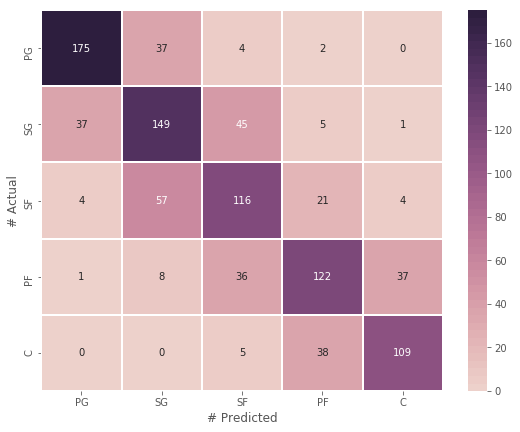

In [100]:
# Print confusion matrix using pre-defined function:
cm8 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (175+37+4+2+0), the model correctly predicted "point guard" 175 times.  37 times it thought the point guard was a shooting guard, 4 times it thought the point guard was a small forward, 2 times it thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [101]:
# Print classification report:
gbt1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(gbt1_class_report)

              precision    recall  f1-score   support

          PG       0.81      0.80      0.80       218
          SG       0.59      0.63      0.61       237
          SF       0.56      0.57      0.57       202
          PF       0.65      0.60      0.62       204
           C       0.72      0.72      0.72       152

    accuracy                           0.66      1013
   macro avg       0.67      0.66      0.67      1013
weighted avg       0.66      0.66      0.66      1013



In [102]:
# List features ordered by feature importance:
gbt1_importances = pd.DataFrame(gbt1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
gbt1_importances

,Importance
TRB,0.391388
AST,0.299938
BLK,0.063972
STL,0.032005
ORB,0.028441
PF,0.025411
FTA,0.015471
3PA,0.015326
FG%,0.014294
FGA,0.013885


#### We can see that Gradient Boosted Tree 1 deemed TRB, AST, BLK, STL and ORB to be the most important features that help the model predict positions.  It deemed FT, 3P, 3P%, FG and 2P to be the least important features.  This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do *not* differ greatly position-by-position (like FT and FG) the model deems to be unhelpful toward making predictions.

---

# Gradient Boosted Trees (2 of 2):

### This model will use the top 5 features, identified by GBT 1's "Feature Importance" chart, rather than all features.

In [103]:
# New clean dataframe:
df2_gbt2 = df_decision_tree1.copy()
df2_gbt2 = df2_gbt2[['TRB', 'AST', 'BLK', 'STL', 'ORB', 'Pos']]
df2_gbt2.head()

,TRB,AST,BLK,STL,ORB,Pos
0,6.6,2.7,0.8,0.9,1.9,PF
3,4.0,3.4,0.2,1.3,0.8,SG
4,4.1,2.5,0.7,1.9,1.2,PG
5,3.8,6.3,0.2,1.5,0.5,PG
8,4.9,3.5,0.2,0.8,0.7,SG


In [104]:
# Set X (features) and y (target):
X = df2_gbt2.drop('Pos', axis=1)
y = df2_gbt2.loc[:, 'Pos']

In [105]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    947
PG    873
PF    814
SF    809
C     608
Name: Pos, dtype: int64

In [106]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [107]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3038, 5)
y_train: (3038, 1)
X_test: (1013, 5)
y_test: (1013, 1)


In [108]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [109]:
# Create, fit, and predict Gradient Boosted Tree Model:
gbt2_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=3, random_state=1)
gbt2_model = gbt2_model.fit(X_train_scaled, y_train)
predictions = gbt2_model.predict(X_test_scaled)

In [110]:
# Print accuracy score:
gbt2_accuracy_score = accuracy_score(y_test, predictions)
gbt2_accuracy_score

0.6574531095755183

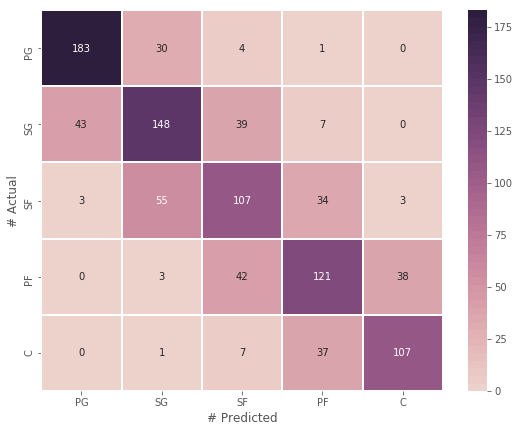

In [111]:
# Print confusion matrix using pre-defined function:  
cm9 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy.  We can see in the above, for instance, that out of the 218 point guards included in the Testing Dataset (183+30+4+1+0), the model correctly predicted "point guard" 183 times.  30 times it thought the point guard was a shooting guard, 4 times it thought the point guard was a small forward, 1 time it thought the point guard was a power forward, and it never thought the point guard was a center.  That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [112]:
# Print classification report:
gbt2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(gbt2_class_report)

              precision    recall  f1-score   support

          PG       0.80      0.84      0.82       218
          SG       0.62      0.62      0.62       237
          SF       0.54      0.53      0.53       202
          PF       0.60      0.59      0.60       204
           C       0.72      0.70      0.71       152

    accuracy                           0.66      1013
   macro avg       0.66      0.66      0.66      1013
weighted avg       0.66      0.66      0.66      1013



### Compare the results of Gradient Boosted Tree 1 to those of Gradient Boosted Tree 2; did reducing features to the top 5 improve the model?

In [113]:
print(f'GBT 1 Accuracy Score (all 20 features): {gbt1_accuracy_score}. \nGBT 2 Accuracy Score (top 5 features): {gbt2_accuracy_score}.')

GBT 1 Accuracy Score (all 20 features): 0.6623889437314906. 
GBT 2 Accuracy Score (top 5 features): 0.6574531095755183.


In [114]:
print(f'GBT1 Class. Report (all 20 features): {gbt1_class_report}. \nGBT2 Class. Report (top 5 features): {gbt2_class_report}.')

GBT1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.81      0.80      0.80       218
          SG       0.59      0.63      0.61       237
          SF       0.56      0.57      0.57       202
          PF       0.65      0.60      0.62       204
           C       0.72      0.72      0.72       152

    accuracy                           0.66      1013
   macro avg       0.67      0.66      0.67      1013
weighted avg       0.66      0.66      0.66      1013
. 
GBT2 Class. Report (top 5 features):               precision    recall  f1-score   support

          PG       0.80      0.84      0.82       218
          SG       0.62      0.62      0.62       237
          SF       0.54      0.53      0.53       202
          PF       0.60      0.59      0.60       204
           C       0.72      0.70      0.71       152

    accuracy                           0.66      1013
   macro avg       0.66      0.66      0.66      1013


# Final Gradient Boosted Trees (GBTs) Conclusion:
### After running the two GBT models, I achieved a max accuracy score of 66.2% - this model used all 20 features.  This is a decrease from the 71.4% accuracy of Random Forest 1 model.

---

# Final Conclusion:
**Best Accuracy Score: Random Forest 1 model: 71.4%**  
**Best Classification Report Scores: Random Forest 1 model: 72% precision, 71% recall, 72% F1 score**  
**Best Overall Model: Random Forest 1 model**  

---

## Let's use the best model (Random Forest 1) and give it specific predictions, feeding it real stats of real players, and see how it classifies each player.  We will use players who define their position well, which the model should correctly predict, along with players who play a more fluid game, a more "positionless" game, in which their skill-set is not confined to the traditional responsibilities of the position.

### Select Specific Players/Rows:

In [115]:
# Selecting players who define their position well:
pg_steph_row = original_df.loc[((original_df['Player'] == 'Stephen Curry') & (original_df['Age'] == 26))]
sg_beal_row = original_df.loc[((original_df['Player'] == 'Bradley Beal') & (original_df['Age'] == 24))]
sf_kawhi_row = original_df.loc[((original_df['Player'] == 'Kawhi Leonard') & (original_df['Age'] == 25))]
pf_love_row = original_df.loc[((original_df['Player'] == 'Kevin Love') & (original_df['Age'] == 27))]
c_embiid_row = original_df.loc[((original_df['Player'] == 'Joel Embiid') & (original_df['Age'] == 24))]

# Concatenate above into one dataframe:
position_players_df = pd.concat([pg_steph_row, sg_beal_row, sf_kawhi_row, pf_love_row, c_embiid_row], axis='rows', join='inner')

# Drop/Re-order columns to mimic Random Forest 1's dataset:
position_players_df = position_players_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']]

# Scale data (model data was scaled, so this data needs to be scaled as well):
position_players_df_scaled = scaler.fit_transform(position_players_df)

In [116]:
# Select players who play a more "positionless" game, in which their stats are not confined to the traditional responsibilities of their position:
pg_simmons_row = original_df.loc[((original_df['Player'] == 'Ben Simmons') & (original_df['Age'] == 22))]
pg_westbrook_row = original_df.loc[((original_df['Player'] == 'Russell Westbrook') & (original_df['Age'] == 24))]
sg_harden_row = original_df.loc[((original_df['Player'] == 'James Harden') & (original_df['Age'] == 26))]
pf_lebron_row = original_df.loc[((original_df['Player'] == 'LeBron James') & (original_df['Age'] == 33))]
pf_draymond_row = original_df.loc[((original_df['Player'] == 'Draymond Green') & (original_df['Age'] == 27))]
pf_giannis_row = original_df.loc[((original_df['Player'] == 'Giannis Antetokounmpo') & (original_df['Age'] == 23))]
c_gasol_row = original_df.loc[((original_df['Player'] == 'Marc Gasol') & (original_df['Age'] == 33))]

# Concatenate above into one dataframe:
positionless_players_df = pd.concat([pg_simmons_row, pg_westbrook_row, sg_harden_row, pf_lebron_row, pf_draymond_row, pf_giannis_row, c_gasol_row], axis='rows', join='inner')

# Drop/Re-order columns to mimic Random Forest 1's dataset:
positionless_players_df = positionless_players_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']]

# Scale data (model data was scaled, so this data needs to be scaled as well):
positionless_players_df_scaled = scaler.fit_transform(positionless_players_df)

### Now, let's feed the Random Forest 1 model these scaled stats, and see what it predicts:
#### Keep in mind that I encoded the y-labels earlier: PG = 1, SG = 2, SF = 3, PF = 4, C = 5.

In [117]:
# Predict first dataframe, containing players who define their position well:
# A PG, SG, SF, PF, then C were loaded in.  Therefore, this output should be 1, 2, 3, 4, 5.
# Also keep in mind order of players: PG Curry, SG Beal, SF Leonard, PF Love, C Embiid.
position_predictions = rf1_model.predict(position_players_df_scaled)
position_predictions

array([1, 2, 3, 4, 5])

### The Random Forest 1 model correctly predicted all 5 positions, as we expected it to because these players define their position well.  Now, let's feed in the second dataframe, containing players who defy traditional position responsibilities.  I expect that the model will not successfully identify these players.  However, that is where the insight lays - what position does the model think the player plays?

In [118]:
# Predict second dataframe, containing players who play a more "positionless" game:
# A PG, PG, SG, PF, PF, PF, and C were loaded in.  Therefore, this output should be 1, 1, 2, 4, 4, 4, 5.
# Also keep in mind order of players: PG Simmons, PG Westbrook, SG Harden, PF LeBron, PF Draymond, PF Giannis, C Gasol.
positionless_predictions = rf1_model.predict(positionless_players_df_scaled)
positionless_predictions

array([4, 2, 2, 3, 4, 4, 4])

### The Random Forest 1 model correctly predicted 3 of the 7 positions: it correctly predicted James Harden as a SG, Draymond Green as a PF, and Giannis Antetokounmpo as a PF.
### However, it thought PG Ben Simmons was a PF, PG Westbrook was a SG, PF LeBron James was a SF and C Marc Gasol was a PF.
### For a center to be mistaken for a power forward, and vice-versa, or for a point guard to be mistaken for a shooting guard, and vice-versa, is not an egregious error.  These positions are similar and share similar responsibilities, and oftentimes, these players do in fact play both positions over the course of a season, or even at different points in the same game.  The most interesting finding here is the one relating to PG Ben Simmons: the model thought he was a PF.  This is something I expected to, and am glad to, see.  Ben Simmons is 6'10", which is very tall for a point guard.  He is also a notoriously bad shooter for his position, rarely shooting from the outside, and mostly missing when he does.  Therefore, his stats are more similar to those of power forwards, grabbing rebounds and shooting poorly from the outside.  This is why the model thought he was a power forward.

### Let's do the same thing, but this time, we'll use the 2020-2021 season statistics for my favorite NBA team, the New York Knicks:

In [119]:
# Load in 2020-2021 Knicks dataframe:
knicks_csv_path = Path('CSVs/knicks.csv')
knicks_df = pd.read_csv(knicks_csv_path)

# This particular dataset did not contain a "Position" column.  Let's add one ourselves:
positions = {'Position': ['PF', 'SG', 'C', 'PG', 'SF', 'SF', 'SG', 'C', 'PG', 'SG', 'PF', 'PG', 'PG', 'SG', 'SF', 'PG']}
df_positions = pd.DataFrame(positions)
knicks_df['Pos'] = df_positions

# Filter DataFrame to only include rows with at least 100 Minutes Played:
# We are only 15 games through the 2020-2021 season at the time of this writing,
# so a few players who have been injured have very few minutes: remove them
# from the dataset.

knicks_df = knicks_df[knicks_df.MP >= 100]
knicks_df

,Rk,Unnamed: 1,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos
0,1,Julius Randle,26,15,15,557,7.9,16.4,0.484,1.4,4.0,0.355,6.5,12.4,0.526,4.8,6.2,0.771,1.4,9.3,10.7,5.9,0.7,0.2,3.5,3.3,22.1,PF
1,2,RJ Barrett,20,15,15,556,6.1,15.4,0.395,0.9,4.2,0.215,5.2,11.2,0.462,3.6,4.7,0.753,1.6,5.8,7.4,3.3,0.8,0.3,1.8,2.1,16.6,SG
2,3,Mitchell Robinson,22,15,15,450,4.6,7.2,0.644,0.0,0.0,NaN,4.6,7.2,0.644,0.9,2.0,0.440,4.6,5.3,9.9,0.6,1.7,2.2,0.9,3.3,10.2,C
3,4,Elfrid Payton,26,15,15,436,6.9,15.3,0.449,0.7,2.4,0.310,6.1,12.9,0.474,1.8,2.6,0.688,1.7,3.4,5.1,5.0,0.8,0.2,2.8,2.6,16.3,PG
4,5,Reggie Bullock,29,13,13,376,4.1,10.6,0.387,1.9,6.0,0.317,2.2,4.6,0.479,0.7,1.0,0.700,0.5,5.0,5.5,1.6,1.0,0.2,1.1,3.1,10.8,SF
5,6,Kevin Knox,21,15,0,307,4.7,11.3,0.417,2.7,6.4,0.418,2.0,4.8,0.415,0.9,1.2,0.800,0.8,3.8,4.6,1.5,0.7,0.7,1.6,2.9,13.0,SF
6,7,Austin Rivers,28,11,2,281,4.7,11.3,0.420,2.6,6.5,0.392,2.2,4.7,0.459,0.3,0.5,0.500,0.4,3.6,4.0,3.5,0.6,0.0,1.8,2.7,12.3,SG
7,8,Nerlens Noel,26,13,0,198,3.1,5.6,0.548,0.0,0.2,0.000,3.1,5.5,0.567,0.7,1.3,0.571,2.9,7.1,10.0,0.7,2.2,4.0,2.9,4.5,6.9,C
8,9,Immanuel Quickley,21,11,0,197,6.8,16.8,0.402,2.4,6.9,0.342,4.4,9.9,0.444,4.2,4.4,0.958,0.2,3.1,3.3,5.3,1.3,0.7,1.8,4.2,20.1,PG


In [120]:
# Drop/Re-order columns to mimic Random Forest 1's dataset:
knicks_df = knicks_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']]

# Replace "NaN" values with "0" instead of dropping null rows completely (helps preserve the data):
knicks_df[np.isnan(knicks_df)] = 0.0

knicks_df

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV
0,22.1,10.7,1.4,5.9,0.7,0.2,7.9,16.4,0.484,1.4,4.0,0.355,6.5,12.4,0.526,4.8,6.2,0.771,3.3,3.5
1,16.6,7.4,1.6,3.3,0.8,0.3,6.1,15.4,0.395,0.9,4.2,0.215,5.2,11.2,0.462,3.6,4.7,0.753,2.1,1.8
2,10.2,9.9,4.6,0.6,1.7,2.2,4.6,7.2,0.644,0.0,0.0,0.000,4.6,7.2,0.644,0.9,2.0,0.440,3.3,0.9
3,16.3,5.1,1.7,5.0,0.8,0.2,6.9,15.3,0.449,0.7,2.4,0.310,6.1,12.9,0.474,1.8,2.6,0.688,2.6,2.8
4,10.8,5.5,0.5,1.6,1.0,0.2,4.1,10.6,0.387,1.9,6.0,0.317,2.2,4.6,0.479,0.7,1.0,0.700,3.1,1.1
5,13.0,4.6,0.8,1.5,0.7,0.7,4.7,11.3,0.417,2.7,6.4,0.418,2.0,4.8,0.415,0.9,1.2,0.800,2.9,1.6
6,12.3,4.0,0.4,3.5,0.6,0.0,4.7,11.3,0.420,2.6,6.5,0.392,2.2,4.7,0.459,0.3,0.5,0.500,2.7,1.8
7,6.9,10.0,2.9,0.7,2.2,4.0,3.1,5.6,0.548,0.0,0.2,0.000,3.1,5.5,0.567,0.7,1.3,0.571,4.5,2.9
8,20.1,3.3,0.2,5.3,1.3,0.7,6.8,16.8,0.402,2.4,6.9,0.342,4.4,9.9,0.444,4.2,4.4,0.958,4.2,1.8


In [121]:
# Scale data (model data was scaled, so this data needs to be scaled as well):
knicks_df_scaled = scaler.fit_transform(knicks_df)

In [122]:
knicks_df_scaled

array([[ 1.69281681,  1.48156676, -0.1250782 ,  1.48492907, -0.75800914,
        -0.59683607,  1.67405391,  1.09632868,  0.28901941,  0.        ,
        -0.02639359,  0.62884109,  1.51367546,  1.30206153,  0.43779469,
         1.7225638 ,  1.89271682,  0.55504257,  0.15493173,  1.81057146],
       [ 0.50592684,  0.25244573,  0.02501564,  0.13289249, -0.56309251,
        -0.51666406,  0.452447  ,  0.83460565, -0.8133832 , -0.49889258,
         0.05278717, -0.30773075,  0.71592758,  0.93585673, -0.51739373,
         0.98724012,  1.09172381,  0.4364187 , -1.51833094, -0.27226639],
       [-0.87518149,  1.18359803,  2.27642321, -1.27114551,  1.19115723,
         1.00660413, -0.56555875, -1.31152317,  2.2708668 , -1.39689922,
        -1.61000875, -1.7460375 ,  0.34773625, -0.28482596,  2.19892334,
        -0.66723815, -0.35006361, -1.62631867,  0.15493173, -1.37494524],
       [ 0.44118738, -0.60421438,  0.10006256,  1.01691641, -0.56309251,
        -0.59683607,  0.99538341,  0.80843335, -

In [123]:
# Predict Knicks dataframe:
knicks_predictions = rf1_model.predict(knicks_df_scaled)
knicks_predictions

array([4, 3, 5, 1, 3, 2, 2, 5, 1])

### The Random Forest 1 model correctly predicted 7 of the 9 positions: it correctly predicted Julius Randle as a PF, Mitchell Robinson as a C, Elfrid Payton as a PG, Reggie Bullock as a SF, Austin Rivers as a SG, Nerlens Noel as a C and Immanuel Quickley as a PG.  
### However, it thought SG RJ Barrett was a SF and it thought SF Kevin Knox was a SG.
### What I expected to see is exactly what happened - SG RJ Barrett was *not* in fact identified as a SG, or even as a PG.  This is because RJ Barrett, at least at this point in his young career, is an inconsistent, abysmal shooter who scores most of his points in the paint.
### This information is useful because it can be one of the factors in setting lineups - which players can play multiple positions, or which players could see success trying their hand in a new role.  In this particular case with Barrett, it could be a warning signal to the Knicks not to play him at SG, but to instead play him at what the model predicted he was, a SF.  Perhaps the Knicks can switch Barrett and Knox's positions - play Barrett at SF and Knox at SG, like the model predicted.

---

## Try it yourself! Feed the model hypothetical stats, and see what position it predicts!  Keep in mind: stats are per 36 minutes, *not* per game.

In [227]:
# Create custom dataframe of hypothetical stats:
my_stats_dict = {
        'PTS': 20,
        'TRB': 1,
        'ORB': 0,
        'AST': 10,
        'STL': 2,
        'BLK': 0,
        'FG': 7,
        'FGA': 17,
        'FG%': 0.43,
        '3P': 3,
        '3PA': 8,
        '3P%': 0.40,
        '2P': 3,
        '2PA': 9,
        '2P%': 0.46,
        'FT': 8,
        'FTA': 5,
        'FT%': 0.92,
        'PF': 3,
        'TOV': 3}
index = range(1)
my_stats_df = pd.DataFrame(my_stats_dict, index=index)

# Manually scale each column using a for-loop (cannot use Standard Scaler for only 1 prediction, only 1 row of data):
columns = ['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']
for item in columns:
    my_stats_df[item] = (my_stats_df[item] - df[item].mean())/df[item].std()

In [228]:
# Make Prediction:
# Keep in mind: PG = 1.  SG = 2.  SF = 3.  PF = 4.  C = 5.
my_prediction = rf1_model.predict(my_stats_df)
my_prediction

array([1])

---

### Ways to improve model:
The first, and most obvious, way to improve the model would be to use a larger dataset; my dataset contained 15 seasons and 4051 rows of data (after filtering), which is not small, but a larger dataset with more training/testing data could have benefitted.  Another way to improve the models' accuracy would be to filter the dataframe even further: I only included players with at least 820 minutes played in the season (10 min/game * 82 games), which I felt was a good number to use because it filtered out rarely-used players while still keeping a good amount of the data.  Using a higher threshold of minutes played would ensure that the players included in the dataset are truly representative of that position's output.

I also think a key feature was missing from the original dataset: the player's height.  This is a huge factor in determining one's position, and I believe if that feature was included in the original dataset, it would have been deemed by the models as one of the most important feautures and would have ultimately increased accuracy scores across the board.  More robust feature engineering in general would serve this dataset well.

In addition, today's NBA is becoming increasingly more "positionless".  Players' skill-sets are much more thorough and comprehensive than they used to be - back in the day, centers typically did not shoot three pointers and point guards did not grab many rebounds.  But in today's game, one's "position" on paper does not mean all that much; players have a variety of skills, and like we saw above in Random Forest 1's predictions, it is not so easy to predict positions anymore in the NBA.  Using seasons from many years ago, much older than 15 years - when the game was more rigid than it is today and players mainly stuck to the traditional responsibilities of their respective position - would make it easier for the model to make predictions.  A next step could be to use another Random Forest model using the same 20 features, but this time, use a different dataset, one containing NBA data from, say, 1980-1990, and see how accurate the model is compared to the model's accuracy using more current NBA data.